# Numeric Solutions to Differential Equations

In this notebook we explore the usage of some methods for finding numeric solutions to differential equations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import integrate

As a basic example, we find a numeric solution to a basic differential equation. This one comes from Differential Equations and Linear Algebra (4e) Chapter 1.5, Equation 1.

$$
\frac{dx}{dy} = 2xy
$$

where $y > 0$. The solution is found to be $y = C e^{x^2}$ where $C$ is some constant determined by the initial condition (or alternatively $y = e^{x^2 + D}$ for some $D$ also determinted by the initial condition).

In this example, we'll use the `solve_ivp()` function from the  `integrate` module offered by Python's SciPy library to do the numerical calculation. Conventionally, the "free" variable is called $t$ (i.e. "time" usually) in the documentation, so we'll replace $x$ with $t$ in our code.

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [-4.000e+00 -3.992e+00 ...  3.992e+00  4.000e+00]
        y: [[ 1.000e+00  9.380e-01 ...  8.489e-01  9.050e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 176
     njev: 0
      nlu: 0


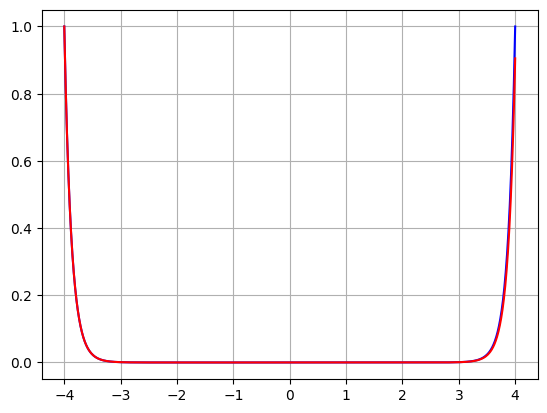

In [2]:
def example_1():

    # The differential equation should be expressed as dy/dx = func(x, y). In practice, y will be
    # an ndarray since integrate.solve_ivp() can evaluate systems of differential equations.
    def func(t, y):
        return 2 * t * y

    # The integrate.solve_ivp() function requires a range for the values of t we are interested in.
    t0, t1 = -4.0, 4.0
    
    # Conventionally, the particular values of t we are interested in are called t_eval.
    NUM_SAMPLES=1000
    t_eval = np.linspace(t0, t1, NUM_SAMPLES)

    # We're also interested in a particular solution, so we provide an initial condition. This is
    # the value of y at t=t0.
    yt0 = 1.0

    # Given the initial condition, we can actually find our explicit particular solution, which we'll
    # use for comparison.
    def solution(t):
        return np.exp(t*t - 16)

    # We call our explicit solution values y_eval in the spirit of t_eval.
    y_eval = solution(t_eval)

    # Let's find the numeric solutions! integrate.solve_ivp() can work with systems of differential
    # equations, so our "state vector" (comprised of our initial condition here) is expressed an a ndarray.
    result = integrate.solve_ivp(func, (t0, t1), np.array([yt0]), t_eval=t_eval)

    # For completeness, we print the results which shows us what sort of information we now have available.
    print(result)

    # In particualr, the values of t and y we want to plot are located in equivalently named
    # attributes. However, since our initial condition was expressed as an ndarray, we must
    # extract the particular sequence of values of y we are interested in.
    ts = result.t
    ys = result.y[0]

    # The explicit solution is plotted in blue.
    plt.plot(t_eval, y_eval, c='blue')
    # The numeric solution is plotted in red over top.
    plt.plot(ts, ys, c='red')

    # Finally, show the graph.
    plt.grid(True)
    plt.show()

example_1()

We see that our numeric solution matches quite closely to the explicit particular solution.